# Testing SRB_auto file creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = '../datasets/preprocessed/'
SRB_auto = pd.read_hdf(path+'SRBautoDatabase.h5', 'Rat_Behavior').set_index('index')
SRB_auto.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,...,speed,Dmin,Dmax,SRB,SRBall,SRBtt,dtimeA,dtime,SRBall2,SRBtt2
index,,,,,,,,,,,,,,,,,,,,,
0,34,0.141667,-0.055494,0.072800,-0.048448,-0.611095,-0.769759,0.145989,0,-76.563981,...,0.0,0.0,0.0,0,0,0,0.0,0.000000,0,0
1,35,0.145833,-0.055403,0.072771,-0.048293,-0.605280,-0.771008,0.157224,0,-75.438984,...,0.0,0.0,0.0,0,0,0,0.0,0.004166,0,0
2,36,0.150000,-0.055312,0.072712,-0.048111,-0.598225,-0.772357,0.168890,0,-74.234640,...,0.0,0.0,0.0,0,0,0,0.0,0.004167,0,0


In [3]:
SRB = pd.read_hdf(path+'SRB.h5', 'Rat_Behavior').set_index('index')
SRB.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id
index,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,0,103.559478,-9.052831,2.093787,1,-14.0,0
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,0,103.520946,-9.246986,2.068201,1,-14.0,0
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,0,103.496176,-5.945695,2.043517,1,-14.0,0


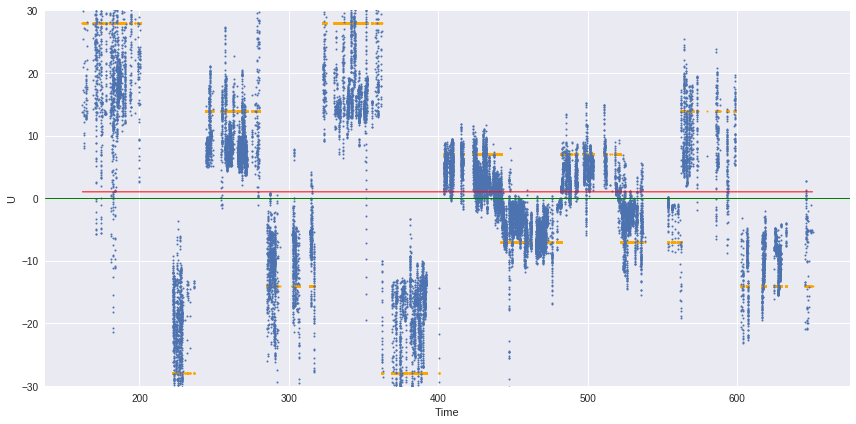

In [4]:
mask = (SRB_auto.session_id == 4) & (SRB_auto.SRBall == True)
temp = SRB_auto[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "SRBall" , alpha=1, linewidth=1, color='red');
g.map(plt.scatter, "Time", "speed" , alpha=1, linewidth=1, color="orange", s=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.scatter, "Time", "U"     , alpha=1, linewidth=1, s=1);



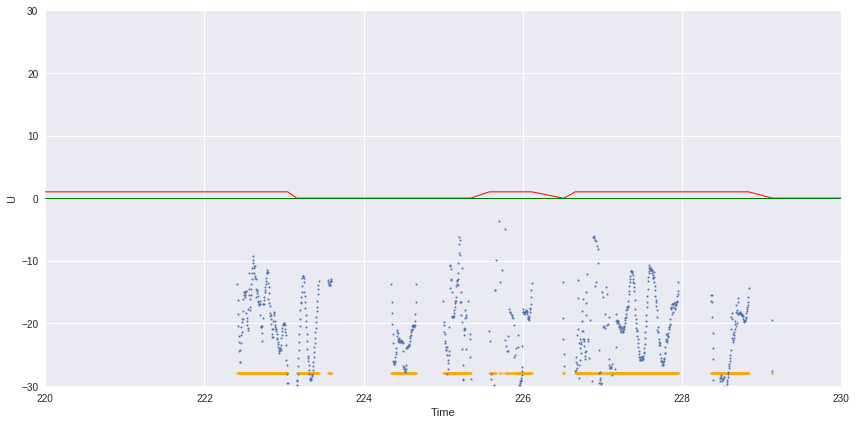

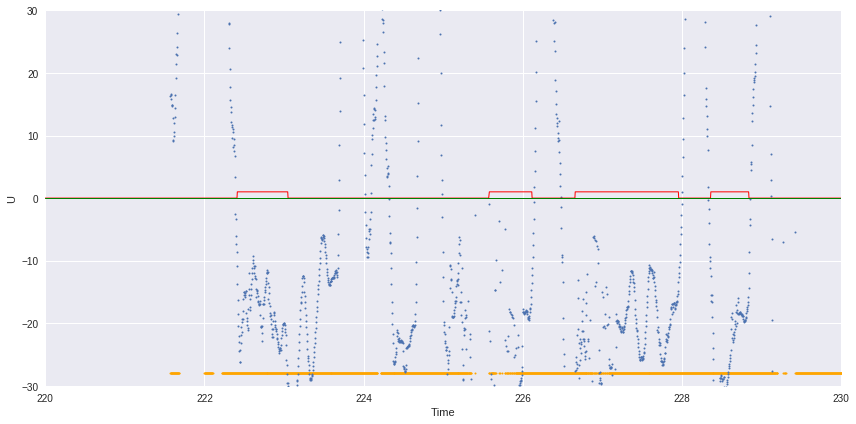

In [5]:
mask = (SRB_auto.session_id == 4) & (SRB_auto.SRBall == True)
temp = SRB_auto[mask]
a, b =220, 230

g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[a, b], ylim=[-30,30])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.scatter, "Time", "speed" , alpha=1, linewidth=1, color="orange", s=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.scatter, "Time", "U"     , alpha=1, linewidth=1, s=1);

mask2 = (SRB_auto.session_id == 4) 
g = sns.FacetGrid(data=SRB_auto[mask2], size=6, aspect=2, xlim=[a, b], ylim=[-30,30])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.scatter, "Time", "speed" , alpha=1, linewidth=1, color="orange", s=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.scatter, "Time", "U"     , alpha=1, linewidth=1, s=1);


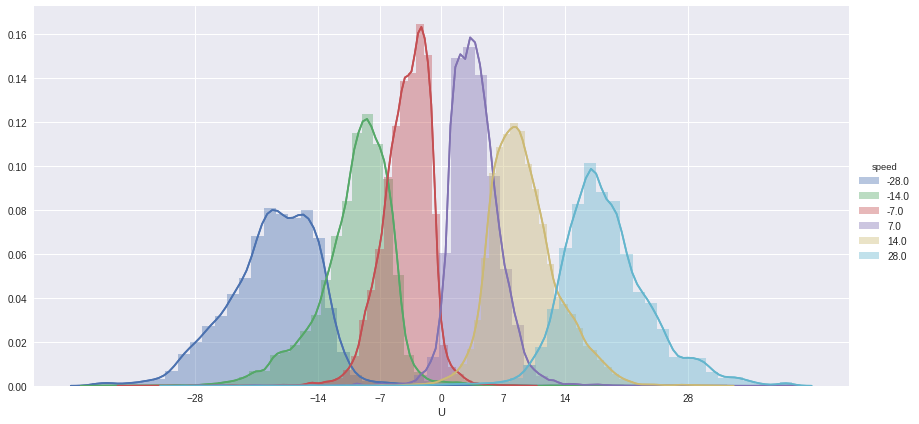

In [8]:
mask_srb = (np.abs(SRB_auto.U) < 40) & (SRB_auto.SRBall2 == True)

srb = SRB_auto[mask_srb]

g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

In [9]:
print(len(srb))

145849
